In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  

<class 'numpy.ndarray'>


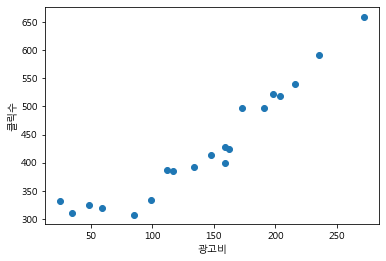

In [11]:
import numpy as np
# skiprows=1: 첫번재 행 skip 
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1) 
print(type(train)) # <class 'numpy.ndarray'>
train_x = train[:, 0] # 모든행 0열
train_y = train[:, 1] # 모든행 1열

plt.plot(train_x, train_y, 'o')
plt.xlabel('광고비')
plt.ylabel('클릭수')
plt.show()


In [5]:
# 표준화: 정규 분포를 표준 정규분포로 변환하는 일, TOEIC ~ TOEFL의 비교
# z = 요소(x) - 평균(μ) / 표준편차(σ)
# z값은 표준 정규분포에서 사용 가능
# 표준 정규 분포: 평균 0, 표준편차가 1인 분포
# 표준 정규 분포표를 만들어 값 비교를 할 수 있도록 지원
m = train_x.mean()
std = train_x.std()
def standardize(x):
    return (x - m) / std 

In [6]:
print(train_x)

[235 216 148  35  85 204  49  25 173 191 134  99 117 112 162 272 159 159
  59 198]


In [7]:
train_z = standardize(train_x)
print(train_z)

[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
 -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
 -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
 -1.23310505  0.84197488]


<class 'numpy.ndarray'>


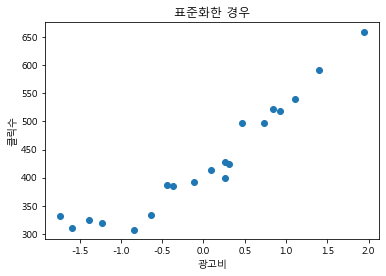

In [13]:
import numpy as np
# 표준화를 해도 분산은 동일함
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1) 
print(type(train)) # <class 'numpy.ndarray'>
train_x = train[:, 0] # 모든행 0열
train_y = train[:, 1] # 모든행 1열

plt.plot(train_z, train_y, 'o')  #표준화된 광고비
plt.title('표준화한 경우')
plt.xlabel('광고비')
plt.ylabel('클릭수')
plt.show()

In [14]:
# y = ax + b
np.random.seed(0)
a = np.random.rand() # 기울기
print(a)
b = np.random.rand() # v
print(b)

0.5488135039273248
0.7151893663724195


In [15]:
# 예측함수
def f(x):
    return a * x + b

In [16]:
# 오차 함수: 선형회귀 값과 실제값의 차이(잔차), 편차의 합은 0
def E(x, y): # 데이터, 실제값
    return np.sum((y - f(x))**2)

In [17]:
## 파이퍼 파라메터(개발자가 지정하는 값)
ETA = 0.01 # 학습률, 오차를 감소시키는 비율
diff = 1     # 학습을 반복할때의 이전 학습과의 차이값
count = 0  # 학습 진행 횟수

In [18]:
# 데이터 확인
for line in train[0:5] :
    print(line)

[235 591]
[216 539]
[148 413]
[ 35 310]
[ 85 308]


In [22]:
print(train_z[0:5])
e = E(train_z,train_y)
print('오차 : ', e)

[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606 ]
오차 :  3862934.2167720823


In [24]:
print(f(train_z)) # y = ax + b

[ 1.48041885  1.32475118  0.76762479 -0.15818818  0.25146358  1.22643476
 -0.04348569 -0.24011853  0.97245067  1.1199253   0.6529223   0.36616607
  0.5136407   0.47267553  0.88232728  1.78356115  0.85774818  0.85774818
  0.03844466  1.17727655]


In [25]:
# 기울기 a를 산출하는 공식 
print(np.sum((f(train_z) - train_y) * train_z))
# 편향 b를 구하는 공식
print(np.sum(f(train_z) - train_y))

-1858.5990883282816
-8568.69621267255


In [26]:
# 학습을하여 a, b 값을 찾음
while diff > 0.01: # 학습에 따른 이전 학습과의 오차의 감소값
    print('a의 감소값: {0: .3f}'.format(ETA * np.sum(((f(train_z) - train_y) * train_z))))
    a = a - ETA * np.sum(((f(train_z) - train_y) * train_z))  # 기울기
    print('b의 감소값: {0: .3f}'.format(ETA * np.sum(f(train_z) - train_y)))
    b = b - ETA * np.sum(f(train_z) - train_y) # 편향, b - ETA * (ax + b의 값 - 실제값)
    
    # a, b의 값의 변경은 함수 f(x)를 변경하게 됨.
    current_error = E(train_z, train_y) # E() -> f(x)
    diff = e - current_error # 에러가 얼마나 떨어지는지 모니터링위해  차이값을 산출
    e = current_error  #  다음 차이값을 계산하기위하여 다시 e 변수에 할당
    count = count + 1
    log = '{0}번째: 기울기 {1: .1f}, 편향 {2: .1f}, 차분 {3: .3f}'
    print(log.format(count, a, b, diff))   

a의 감소값: -18.586
b의 감소값: -85.687
1번째: 기울기  19.1, 편향  86.4, 차분  1383785.016
a의 감소값: -14.869
b의 감소값: -68.550
2번째: 기울기  34.0, 편향  155.0, 차분  885622.411
a의 감소값: -11.895
b의 감소값: -54.840
3번째: 기울기  45.9, 편향  209.8, 차분  566798.343
a의 감소값: -9.516
b의 감소값: -43.872
4번째: 기울기  55.4, 편향  253.7, 차분  362750.939
a의 감소값: -7.613
b의 감소값: -35.097
5번째: 기울기  63.0, 편향  288.8, 차분  232160.601
a의 감소값: -6.090
b의 감소값: -28.078
6번째: 기울기  69.1, 편향  316.8, 차분  148582.785
a의 감소값: -4.872
b의 감소값: -22.462
7번째: 기울기  74.0, 편향  339.3, 차분  95092.982
a의 감소값: -3.898
b의 감소값: -17.970
8번째: 기울기  77.9, 편향  357.3, 차분  60859.509
a의 감소값: -3.118
b의 감소값: -14.376
9번째: 기울기  81.0, 편향  371.6, 차분  38950.086
a의 감소값: -2.495
b의 감소값: -11.501
10번째: 기울기  83.5, 편향  383.1, 차분  24928.055
a의 감소값: -1.996
b의 감소값: -9.201
11번째: 기울기  85.5, 편향  392.3, 차분  15953.955
a의 감소값: -1.597
b의 감소값: -7.360
12번째: 기울기  87.1, 편향  399.7, 차분  10210.531
a의 감소값: -1.277
b의 감소값: -5.888
13번째: 기울기  88.4, 편향  405.6, 차분  6534.740
a의 감소값: -1.022
b의 감소값: -4.711
14번째: 기울기  89.4, 편향  410.

In [28]:
print('f(x)=', a, '*x ', b)

f(x)= 93.4737083323659 *x  429.12667379017057


In [29]:
# 표준화된 데이터로 학습을 했음으로 표준화된 데이터를 이용하여 테스트해야함.
for i in range(len(train_z)):
    predict = f(train_z[i]) #  predict = a * train_z[i] + b
    fmt = '실제 비용: {0}, 클릭수:{1}, 예상비용: {2: .0f}, 차이: {3: .0f}'
    print(fmt.format(train_x[i], train_y[i], predict, train_y[i] - predict))

실제 비용: 235, 클릭수:591, 예상비용:  559, 차이:  32
실제 비용: 216, 클릭수:539, 예상비용:  533, 차이:  6
실제 비용: 148, 클릭수:413, 예상비용:  438, 차이: -25
실제 비용: 35, 클릭수:310, 예상비용:  280, 차이:  30
실제 비용: 85, 클릭수:308, 예상비용:  350, 차이: -42
실제 비용: 204, 클릭수:519, 예상비용:  516, 차이:  3
실제 비용: 49, 클릭수:325, 예상비용:  300, 차이:  25
실제 비용: 25, 클릭수:332, 예상비용:  266, 차이:  66
실제 비용: 173, 클릭수:498, 예상비용:  473, 차이:  25
실제 비용: 191, 클릭수:498, 예상비용:  498, 차이: -0
실제 비용: 134, 클릭수:392, 예상비용:  419, 차이: -27
실제 비용: 99, 클릭수:334, 예상비용:  370, 차이: -36
실제 비용: 117, 클릭수:385, 예상비용:  395, 차이: -10
실제 비용: 112, 클릭수:387, 예상비용:  388, 차이: -1
실제 비용: 162, 클릭수:425, 예상비용:  458, 차이: -33
실제 비용: 272, 클릭수:659, 예상비용:  611, 차이:  48
실제 비용: 159, 클릭수:400, 예상비용:  453, 차이: -53
실제 비용: 159, 클릭수:427, 예상비용:  453, 차이: -26
실제 비용: 59, 클릭수:319, 예상비용:  314, 차이:  5
실제 비용: 198, 클릭수:522, 예상비용:  508, 차이:  14


In [30]:
startx = np.min(train_z)
print(startx)
startx = np.max(train_z)
print(startx)

-1.7406785589737952
1.9466936885950508


In [33]:
x = np.linspace(-2,2,100)
print(x)

[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
  1.15151515  1.19191919  1.23232323  1.27272727  1.3

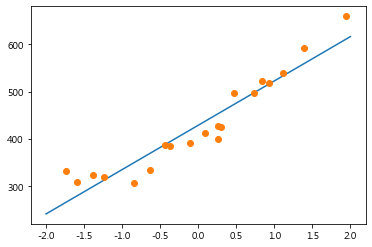

In [36]:
# f(x)= 93.4737083323659 *x+ 429.12667379017057
plt.plot(x, f(x)) # 테스트 데이터를 이용하여 기울기 확인
plt.plot(train_z,train_y, 'o') # click.csv 데이터
plt.show()